In [31]:
from pyomo.environ import * 
from pyomo.mpec import *
import scipy as sp
import numpy as np 
import pandas as pd
import os,time,openpyxl,sys
import os,sys,csv, pickle
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times"
})

# Figure 1

In [32]:
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,"rand_LCP-n=500_psd.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) & (np.abs(res_df['Mosek Sol. Diff.']) < 1e-4),True,False)

succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()
res_df['Time per Solve'] = res_df['Mosek RT']/res_df['Mosek Iters']
num_cols = ['PATH RT', 'Mosek RT', 'Mosek Iters','Successful Solve','Time per Solve']
avg_res_df = res_df[num_cols].loc[res_df['Successful Solve']].groupby(['size (n)', 'density']).mean()
#avg_res_df[['PATH RT', 'Mosek RT', 'Mosek Iters']]


In [33]:
df1 = avg_res_df

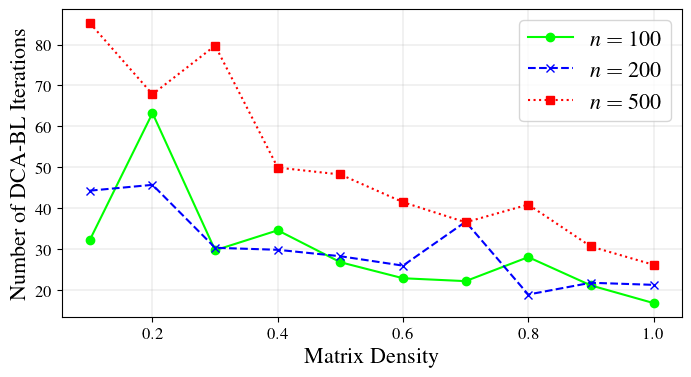

In [34]:
# DCA Iterations vs problem size 
densities = np.arange(1,11)/10
plt.figure(figsize=(8,4))
plt.plot(densities, 
         avg_res_df.xs(100,level=0)['Mosek Iters'],
         label=r'$n=100$',
         color='lime',
         marker='o',
         linestyle='solid')
plt.plot(densities, 
         avg_res_df.xs(200,level=0)['Mosek Iters'],
         label=r'$n=200$',
         color='blue',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         avg_res_df.xs(500,level=0)['Mosek Iters'],
         label=r'$n=500$',
         color='red',
         marker='s',
         linestyle='dotted')
plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density',fontsize=16)
plt.grid(color='grey',linewidth=0.15)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)
plt.show()

# Figure 2

In [35]:
path = '/Users/dominicflocco/Repositories/DCA/LCP/output'
fname = os.path.join(path, 'rand_LCP-n=1000.xlsx')
dca_res_df = pd.read_excel(fname,index_col=[0,1,2])
fname = os.path.join(path, 'rand_LCP-PATH-n=1000.xlsx')
path_res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df = dca_res_df.join(path_res_df)

d_names = [2,4,6,8,10]
dca_dfs = {}
for d in d_names: 
    dca_dfs[d] = pd.read_excel(os.path.join(path,f'rand_LCP-n=2000-{d}.xlsx'),index_col=[0,1,2])
dca_res_df_2 = pd.concat(dca_dfs.values()) 
p_names = [5,10]
path_dfs = {}
for p in p_names: 
    path_dfs[p] = pd.read_excel(os.path.join(path, f'rand_LCP-PATH-n=2000-{p}.xlsx'),index_col=[0,1,2])
path_res_df_2 = pd.concat(path_dfs.values())
res_df_2 = dca_res_df_2.join(path_res_df_2) 
res_df = pd.concat((res_df,res_df_2),axis=0)

In [36]:
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) ,True,False)
res_df['Time per Solve'] = res_df['Mosek RT']/res_df['Mosek Iters']
succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()
print("Successful Solves:")
succ_solves.groupby(['size (n)']).mean()
num_cols = ['PATH RT', 'Mosek RT', 'Mosek Iters','Successful Solve','Time per Solve']
avg_res_df = res_df[num_cols].loc[res_df['Successful Solve']].groupby(['size (n)', 'density']).mean()
avg_res_df[['PATH RT', 'Mosek RT', 'Mosek Iters','Time per Solve','Successful Solve']]


Successful Solves:


PATH RT     Mosek RT  Mosek Iters  Time per Solve  \
size (n) density                                                          
1000     1          20.746862   928.579339   238.555556        3.270873   
         2          41.549898   430.486064   128.444444        3.490375   
         3          63.146577  1028.610381   164.666667        6.140117   
         4          83.835719   424.125504    80.777778        5.125890   
         5         104.124487  1365.179819   168.000000        6.787107   
         6         124.468918   330.971301    60.444444        5.370686   
         7         144.412147   302.538096    50.375000        5.269326   
         8         164.112659   224.490823    49.111111        4.428432   
         9         185.750158   305.562697    54.666667        4.641907   
         10        204.846474   148.522939    36.888889        4.031480   
2000     1         137.780011  3466.750858   283.222222       11.452871   
         2         263.033441  3148.489326   221.666667       13.879927   
         3         395.138383  3257.166431   149.875000       18.164955   
         4         531.172794  6993.529842   254.750000       23.136678   
         5         676.424482  3031.508574   116.222222       20.229989   
         6         871.467065  6174.358617   150.500000       28.883032   
         7        1021.085168  2006.062337    83.000000       20.857980   
         8        1143.064395  2763.111236   104.777778       21.318202   
         9        1258.206804  4360.034283   118.600000       26.659406   
         10       1392.810864   969.935715    46.700000       19.889712   

                  Successful Solve  
size (n) density                    
1000     1                     1.0  
         2                     1.0  
         3                     1.0  
         4                     1.0  
         5                     1.0  
         6                     1.0  
         7                     1.0  
         8                     1.0  
         9                     1.0  
         10                    1.0  
2000     1                     1.0  
         2                     1.0  
         3                     1.0  
         4                     1.0  
         5                     1.0  
         6                     1.0  
         7                     1.0  
         8                     1.0  
         9                     1.0  
         10                    1.0

In [37]:
df2 = avg_res_df

### New Figure 4

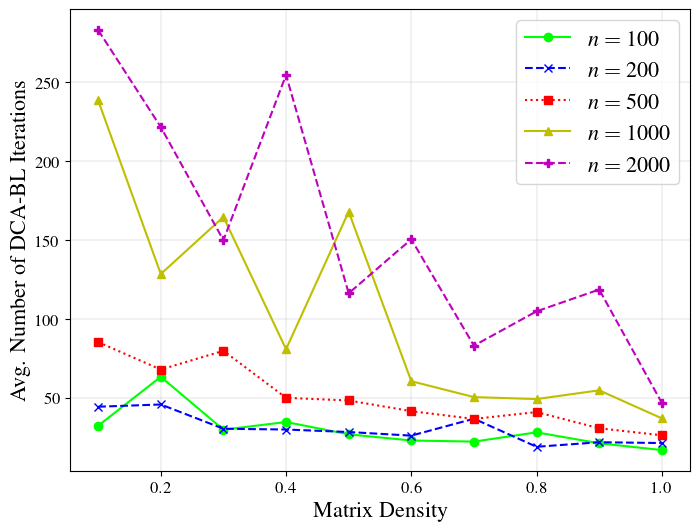

In [38]:
concat_df = pd.concat([df1, df2])

# DCA Iterations vs problem size 
densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         concat_df.xs(100,level=0)['Mosek Iters'],
         label=r'$n=100$',
         color='lime',
         marker='o',
         linestyle='solid')
plt.plot(densities, 
         concat_df.xs(200,level=0)['Mosek Iters'],
         label=r'$n=200$',
         color='blue',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         concat_df.xs(500,level=0)['Mosek Iters'],
         label=r'$n=500$',
         color='red',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_res_df.xs(1000,level=0)['Mosek Iters'],
         label=r'$n=1000$',
         color='y',
         marker='^',
         linestyle='solid')
plt.plot(densities, 
         avg_res_df.xs(2000,level=0)['Mosek Iters'],
         label=r'$n=2000$',
         color='m',
         marker='P',
         linestyle='dashed')
plt.legend(fontsize=16,fancybox=True, loc='upper right',columnspacing=0.8)
# plt.legend(fontsize=16,fancybox=True, bbox_to_anchor=(1.05, 0.75), loc='upper left', borderaxespad=0.,columnspacing=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density',fontsize=16)
plt.grid(color='grey',linewidth=0.15)
plt.ylabel('Avg. Number of DCA-BL Iterations',fontsize=16)
plt.show()

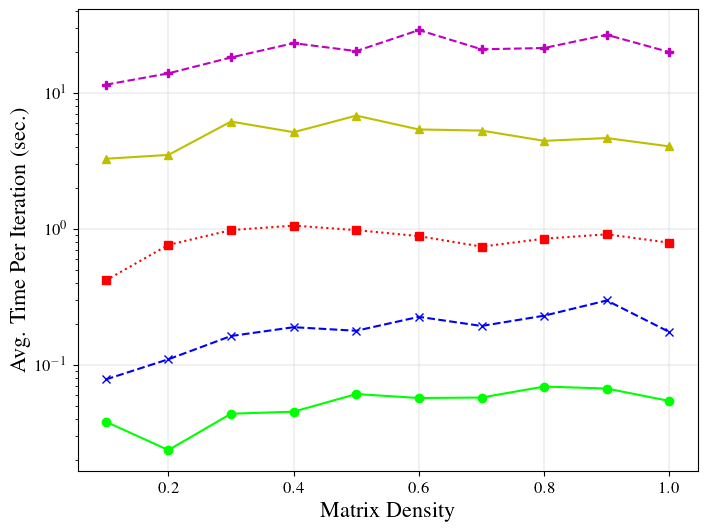

In [39]:
concat_df = pd.concat([df1, df2])

# DCA Iterations vs problem size 
densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         concat_df.xs(100,level=0)['Time per Solve'],
         label=r'$n=100$',
         color='lime',
         marker='o',
         linestyle='solid')
plt.plot(densities, 
         concat_df.xs(200,level=0)['Time per Solve'],
         label=r'$n=200$',
         color='blue',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         concat_df.xs(500,level=0)['Time per Solve'],
         label=r'$n=500$',
         color='red',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_res_df.xs(1000,level=0)['Time per Solve'],
         label=r'$n=1000$',
         color='y',
         marker='^',
         linestyle='solid')
plt.plot(densities, 
         avg_res_df.xs(2000,level=0)['Time per Solve'],
         label=r'$n=2000$',
         color='m',
         marker='P',
         linestyle='dashed')
# plt.legend(fontsize=16,fancybox=True, bbox_to_anchor=(1.05, 0.75), loc='upper left', borderaxespad=0.,columnspacing=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
# plt.ylim([1e-2,1e3])
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density',fontsize=16)
plt.grid(color='grey',linewidth=0.15)
plt.ylabel('Avg. Time Per Iteration (sec.)',fontsize=16)
plt.show()

In [40]:
concat_df

PATH RT     Mosek RT  Mosek Iters  Successful Solve  \
size (n) density                                                            
100      1           0.098221     1.245775    32.217391               1.0   
         2           0.143760     1.734797    63.240000               1.0   
         3           0.186863     1.338190    29.680000               1.0   
         4           0.232980     1.603490    34.560000               1.0   
         5           0.273786     1.823576    26.750000               1.0   
         6           0.318085     1.442487    22.833333               1.0   
         7           0.356076     1.308984    22.125000               1.0   
         8           0.405601     1.933782    28.000000               1.0   
         9           0.448310     1.504917    21.080000               1.0   
         10          0.489947     0.934332    16.760000               1.0   
200      1           0.299610     3.606751    44.260870               1.0   
         2           0.502461     4.989249    45.684211               1.0   
         3           0.713380     4.899823    30.285714               1.0   
         4           0.932206     5.652352    29.791667               1.0   
         5           1.130824     5.124081    28.217391               1.0   
         6           1.359950     5.768019    25.916667               1.0   
         7           1.583637     7.712579    36.652174               1.0   
         8           1.766525     4.410039    18.850000               1.0   
         9           2.013047     6.641221    21.727273               1.0   
         10          2.205940     3.503079    21.217391               1.0   
500      1           2.078547    35.481038    85.260870               1.0   
         2           4.213210    50.002080    67.840000               1.0   
         3           6.294797    73.285906    79.739130               1.0   
         4           8.322264    52.343085    49.904762               1.0   
         5          10.715308    46.492770    48.217391               1.0   
         6          12.709596    34.144289    41.440000               1.0   
         7          15.114774    26.446354    36.521739               1.0   
         8          16.776978    34.907305    40.857143               1.0   
         9          19.423411    27.630750    30.600000               1.0   
         10         21.811293    20.853220    26.125000               1.0   
1000     1          20.746862   928.579339   238.555556               1.0   
         2          41.549898   430.486064   128.444444               1.0   
         3          63.146577  1028.610381   164.666667               1.0   
         4          83.835719   424.125504    80.777778               1.0   
         5         104.124487  1365.179819   168.000000               1.0   
         6         124.468918   330.971301    60.444444               1.0   
         7         144.412147   302.538096    50.375000               1.0   
         8         164.112659   224.490823    49.111111               1.0   
         9         185.750158   305.562697    54.666667               1.0   
         10        204.846474   148.522939    36.888889               1.0   
2000     1         137.780011  3466.750858   283.222222               1.0   
         2         263.033441  3148.489326   221.666667               1.0   
         3         395.138383  3257.166431   149.875000               1.0   
         4         531.172794  6993.529842   254.750000               1.0   
         5         676.424482  3031.508574   116.222222               1.0   
         6         871.467065  6174.358617   150.500000               1.0   
         7        1021.085168  2006.062337    83.000000               1.0   
         8        1143.064395  2763.111236   104.777778               1.0   
         9        1258.206804  4360.034283   118.600000               1.0   
         10       1392.810864   969.935715    46.700000               1.0   

                 

### Figure 2a

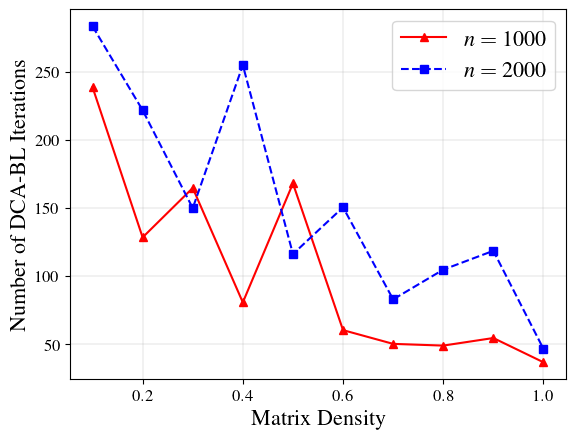

In [41]:
# DCA Iterations vs problem size 
densities = np.arange(1,11)/10
plt.plot(densities, 
         avg_res_df.xs(1000,level=0)['Mosek Iters'],
         label=r'$n=1000$',
         color='red',
         marker='^',
         linestyle='solid')
plt.plot(densities, 
         avg_res_df.xs(2000,level=0)['Mosek Iters'],
         label=r'$n=2000$',
         color='blue',
         marker='s',
         linestyle='dashed')
plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density',fontsize=16)
plt.grid(color='grey',linewidth=0.15)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)
plt.show()

### Figure 2b

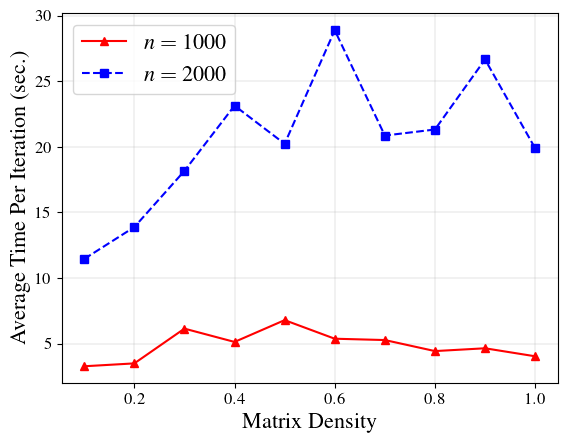

In [42]:
# DCA Iterations vs problem size 
densities = np.arange(1,11)/10
plt.plot(densities, 
         avg_res_df.xs(1000,level=0)['Time per Solve'],
         label=r'$n=1000$',
         color='red',
         marker='^',
         linestyle='solid')
plt.plot(densities, 
         avg_res_df.xs(2000,level=0)['Time per Solve'],
         label=r'$n=2000$',
         color='blue',
         marker='s',
         linestyle='dashed')
plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density',fontsize=16)
plt.grid(color='grey',linewidth=0.15)
plt.ylabel('Average Time Per Iteration (sec.)',fontsize=16)
plt.show()

## Figure 3a

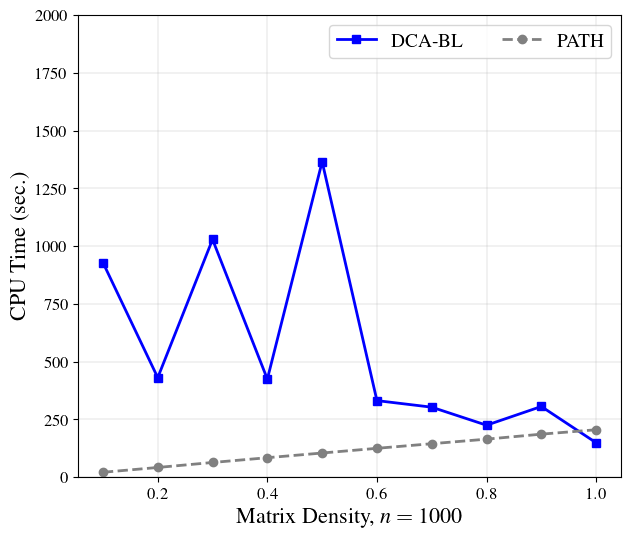

In [43]:
plt.figure(figsize=(7,6))
plt.plot(densities,
            avg_res_df.xs(1000,level=0)['Mosek RT'],
            color='blue',
            linestyle=None,
            label='DCA-BL',
            marker='s',
            linewidth=2)
plt.plot(densities,
            avg_res_df.xs(1000,level=0)['PATH RT'],
            color='grey',
            linestyle='--',
            marker='o',
            label='PATH',
            linewidth=2)
plt.xlabel(r'Matrix Density, $n = 1000$',fontsize=16)
plt.ylabel('CPU Time (sec.)',fontsize=16)
plt.legend(loc='upper right',fontsize=14,ncol=2,fancybox=True)
plt.xticks(fontsize=12)
plt.ylim([0,2000])
plt.yticks(fontsize=12)
plt.grid(color='grey', linewidth=0.15)
plt.show()

## Figure 3b

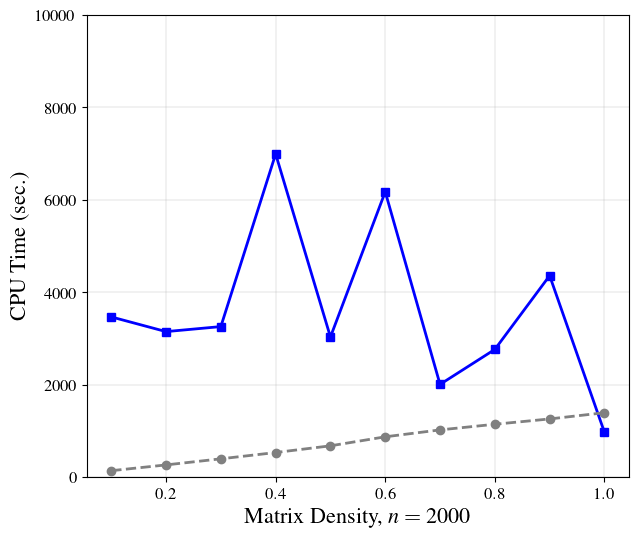

In [44]:
plt.figure(figsize=(7,6))
plt.plot(densities,
            avg_res_df.xs(2000,level=0)['Mosek RT'],
            color='blue',
            linestyle=None,
            label='DCA-BL',
            marker='s',
            linewidth=2)
plt.plot(densities,
            avg_res_df.xs(2000,level=0)['PATH RT'],
            color='grey',
            linestyle='--',
            marker='o',
            label='PATH',
            linewidth=2)
plt.xlabel(r'Matrix Density, $n = 2000$',fontsize=16)
plt.ylabel('CPU Time (sec.)',fontsize=16)
# plt.legend(loc='upper right',fontsize=14,ncol=2,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='grey', linewidth=0.15)
plt.ylim([0,10000])
plt.show()

# Figure 4

In [45]:
n = 100
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
# fname = os.path.join(path,f"rand_LCP-solvertest-n={n}.xlsx")
fname = '/Users/dominicflocco/Repositories/DCA-BL/LCP/output/rand_LCP-solvertest-n=100.xlsx'
res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df

PATH Status PATH Condition   PATH RT    PATH Error  \
size (n) density trial                                                      
100      10      9              ok        optimal  0.414901  2.541045e-15   
                 12             ok        optimal  0.478853  6.773412e-16   
         3       2              ok        optimal  0.190756  8.719579e-16   
         9       15             ok        optimal  0.527375 -1.920242e-16   
         7       10             ok        optimal  0.377428  4.783572e-15   
...                            ...            ...       ...           ...   
         9       24             ok        optimal  0.386533 -3.544134e-14   
         7       21             ok        optimal  0.457416 -2.543599e-15   
         9       18             ok        optimal  0.473299 -4.379141e-16   
         10      4              ok        optimal  0.606538  5.922101e-15   
                 23             ok        optimal  0.617027  4.663714e-14   

                       Mosek Status Mosek Condition  Mosek Warning Flag  \
size (n) density trial                                                    
100      10      9               ok         optimal               False   
                 12              ok         optimal               False   
         3       2               ok         optimal               False   
         9       15              ok         optimal               False   
         7       10              ok         optimal               False   
...                             ...             ...                 ...   
         9       24              ok         optimal               False   
         7       21              ok         optimal               False   
         9       18              ok         optimal               False   
         10      4               ok         optimal               False   
                 23              ok         optimal               False   

                        Mosek RT  Mosek Iters  Mosek Error  ...  \
size (n) density trial                                      ...   
100      10      9      1.777855           35     0.000010  ...   
                 12     3.946204           93     0.000009  ...   
         3       2      1.345981           56     0.000010  ...   
         9       15     1.419224           28     0.000008  ...   
         7       10     3.676205           86     0.000009  ...   
...                          ...          ...          ...  ...   
         9       24     1.767966           33     0.000010  ...   
         7       21     2.333082           60     0.000009  ...   
         9       18     1.235153           28     0.000009  ...   
         10      4      1.474360           31     0.000010  ...   
                 23     1.934668           39     0.000008  ...   

                       CPLEX Warning Flag   CPLEX RT  CPLEX Iters  \
size (n) density trial                                              
100      10      9                  False   4.490863           31   
                 12                 False   5.583163           74   
         3       2                  False   2.109189           45   
         9       15                 False   3.308617           24   
         7       10                 False  11.479657           84   
...                                   ...        ...          ...   
         9       24                 False   2.781548           26   
         7       21                 False   2.658320           42   
         9       18                 False   2.420375           23   
         10      4                  False   1.898108           25   
                 23                 False   2.418516           29   

                        CPLEX Error  ipopt Status  ipopt Condition  \
size (n) density trial                                               
100      10      9         0.000019            ok          optimal   
                 12        0.000088            ok          optima

In [46]:

solvers = ['PATH', 'Mosek', 'Gurobi', 'CPLEX', 'ipopt']
dfs = {}
avg_dfs = {}
print(f"====== n = {n} =========")
for s in solvers:
    if s != 'PATH':
        dfs[s] = res_df.loc[:,[f"{s} RT", 
                f"{s} Iters", 
                f"{s} Error"]]
        dfs[s]['Successful Solve'] = np.where((dfs[s][f'{s} Iters'] < 500),True,False)
        print(f"Successful Solves {s}: {100*dfs[s]['Successful Solve'].sum()/len(dfs[s])}%")
        avg_dfs[s] = dfs[s].loc[dfs[s]['Successful Solve']].groupby(['size (n)', 'density']).mean()
        avg_dfs[s]['Time per Solve'] = avg_dfs[s][f"{s} RT"]/avg_dfs[s][f"{s} Iters"]
    else: 
        dfs[s] = res_df.loc[:,[f"{s} RT", 
                f"{s} Error"]]
        avg_dfs[s] = dfs[s].groupby(['size (n)', 'density']).mean()
       



====== n = 100 =========
Successful Solves Mosek: 97.2%
Successful Solves Gurobi: 91.6%
Successful Solves CPLEX: 94.0%
Successful Solves ipopt: 97.2%


### Figure 4a

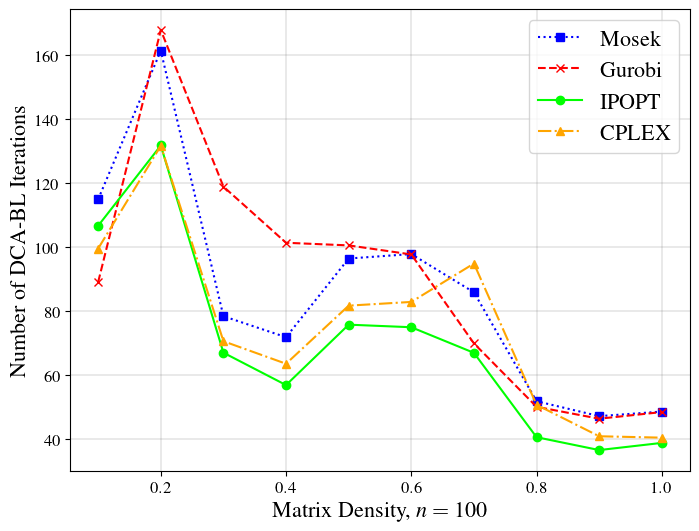

In [47]:
densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         avg_dfs['Mosek']['Mosek Iters'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_dfs['Gurobi']['Gurobi Iters'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         avg_dfs['ipopt']['ipopt Iters'],
         label='IPOPT',
         color='lime',
         marker='o',
         linestyle='solid')
plt.plot(densities, 
         avg_dfs['CPLEX']['CPLEX Iters'],
         label='CPLEX',
         color='orange',
         marker='^',
         linestyle='-.')
plt.legend(fontsize=16,ncol=1,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density, $n = 100$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)
#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

In [48]:
n = 500
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,f"rand_LCP-density-n={n}.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])

solvers = ['mosek', 'gurobi', 'ipopt']
dfs = {}
avg_dfs = {}
print(f"====== n = {n} =========")
for s in solvers:
    if s != 'PATH':
        dfs[s] = res_df.loc[:,[f"{s} RT", 
                f"{s} Iters", 
                f"{s} Error"]]
        dfs[s]['Successful Solve'] = np.where((dfs[s][f'{s} Iters'] < 500) & (dfs[s][f'{s} Error'] != -1),True,False)
        print(f"Successful Solves {s}: {100*dfs[s]['Successful Solve'].sum()/len(dfs[s])}%")
        avg_dfs[s] = dfs[s].loc[dfs[s]['Successful Solve']].groupby(['size (n)', 'density']).mean()
        avg_dfs[s]['Time per Solve'] = avg_dfs[s][f"{s} RT"]/avg_dfs[s][f"{s} Iters"]
    else: 
        dfs[s] = res_df.loc[:,[f"{s} RT", 
                f"{s} Error"]]
        avg_dfs[s] = dfs[s].groupby(['size (n)', 'density']).mean()
       



====== n = 500 =========
Successful Solves mosek: 88.0%
Successful Solves gurobi: 56.5%
Successful Solves ipopt: 83.0%


### Figure 4b

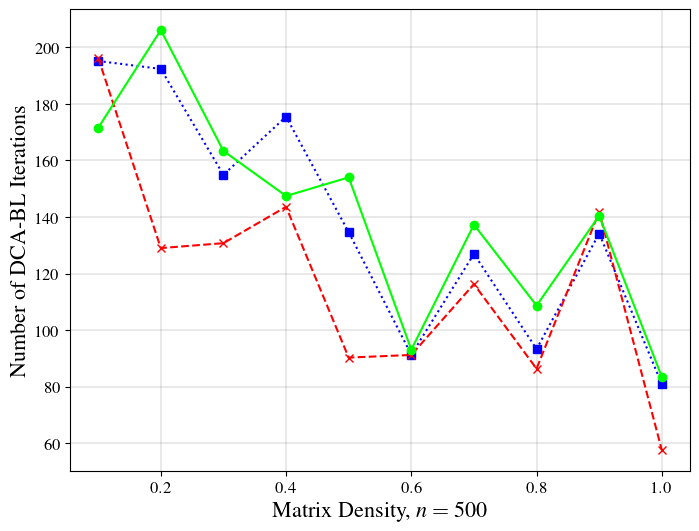

In [49]:
densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         avg_dfs['mosek']['mosek Iters'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_dfs['gurobi']['gurobi Iters'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         avg_dfs['ipopt']['ipopt Iters'],
         label='IPOPT',
         color='lime',
         marker='o',
         linestyle='solid')
# plt.legend(fontsize=16,ncol=3,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title("DCA Iterations vs. Density of (PSD) LCP Matrix")
plt.xlabel(r'Matrix Density, $n = 500$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)
#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

# Figure 5

In [50]:
solves = {}

path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,"rand_LCP-n=500_psd.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) & (np.abs(res_df['Mosek Sol. Diff.']) < 1e-4),True,False)


succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()

num_cols = ['PATH RT', 'Mosek RT', 'Mosek Iters','Successful Solve']
avg_res_df = res_df[num_cols].loc[res_df['Successful Solve']].groupby(['size (n)', 'density']).mean()
avg_res_df[['PATH RT', 'Mosek RT', 'Mosek Iters']]
solves['psd'] = succ_solves.xs(500,level=0)

In [51]:
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,"rand_LCP-n=500_is-v2.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500),True,False)
succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()
solves['sid'] = succ_solves.xs(500,level=0)



In [52]:
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,"rand_LCP-n=500_asym.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) & (np.abs(res_df['Mosek Sol. Diff.']) < 1e-4),True,False)
succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()
solves['asym'] = succ_solves.xs(500,level=0)

In [53]:
print(solves['psd'].mean())
print(solves['sid'].mean())
print(solves['asym'].mean())

0.932
0.52
0.768


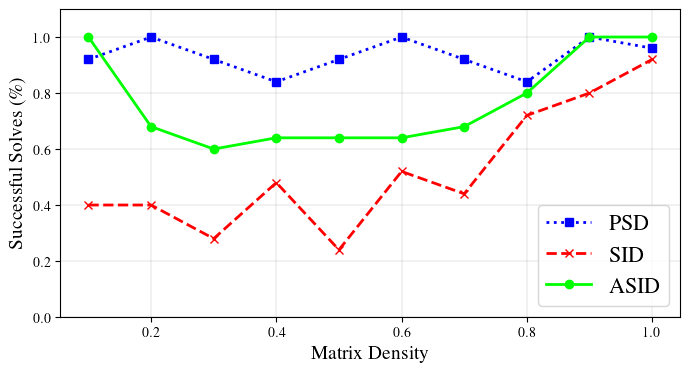

In [54]:
succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()
succ_solves = succ_solves.transpose()
plt.figure(figsize=(8,4))
densities = np.arange(1,11)/10
w = 0.1
plt.plot(densities,
       solves['psd'],
       label=r'PSD',
       color='blue',
       marker='s',
       linestyle='dotted',
       linewidth=2)
plt.plot(densities,
       solves['sid'],
       label=r'SID',
       color='red',
       linewidth=2,
       marker='x',
       ls='--')
plt.plot(densities,
       solves['asym'],
       label=r'ASID',
       color='lime',
       marker='o',
       linewidth=2,
       ls='-')
plt.ylim([0.0,1.1])
plt.legend(fontsize=16, fancybox=True)
plt.grid(color='grey',linewidth=0.15)
plt.xlabel(r'Matrix Density',fontsize=14)
plt.ylabel(r'Successful Solves (\%)',fontsize=14)
plt.show()

In [55]:
path = "/Users/dominicflocco/Repositories/DCA-BL/LCP/zaratan_output"
fname = os.path.join(path,"benchmarks_new.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1])
# fname2 = os.path.join(path,"test_LCP_benchmarks-n=2000.xlsx")
# res_df2 = pd.read_excel(fname2,index_col=[0,1])
# res_df = pd.concat((res_df,res_df2))
res_df = res_df.drop([100,200,500],level=1)
res_df.columns = [
    'PATH Status', 'PATH Iters', 'PATH Runtime', 'PATH Error',
    'LEMKE Status', 'LEMKE Iters', 'LEMKE Runtime', 'LEMKE Error',
    'DCA1 Status', 'DCA1 Iters', 'DCA1 Runtime', 'DCA1 Error',
    'DCA2 Status', 'DCA2 Iters', 'DCA2 Runtime', 'DCA2 Error',
    'DCA-QP Status', 'DCA-QP Iters', 'DCA-QP Runtime', 'DCA-QP Error',
    'DCA-BL Status', 'DCA-BL Iters', 'DCA-BL Runtime', 'DCA-BL Error',
                  ]


In [56]:

runtime_df = res_df[['PATH Runtime', 'LEMKE Runtime', 'DCA1 Runtime', 'DCA-QP Runtime', 'DCA2 Runtime', 'DCA-BL Runtime']]
iters_df = res_df[['LEMKE Iters','DCA1 Iters', 'DCA2 Iters', 'DCA-QP Error', 'DCA-BL Iters']]
error_df = res_df[['PATH Error', 'LEMKE Error', 'DCA1 Error', 'DCA2 Error', 'DCA-QP Error','DCA-BL Error']]

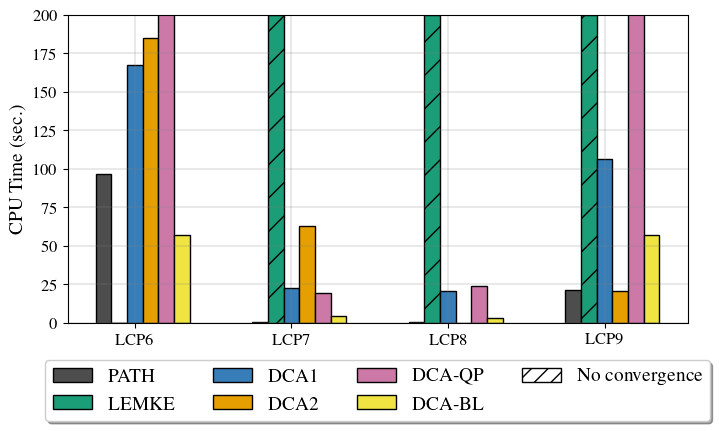

In [57]:
import matplotlib.patches as mpatches
def plot_runtimes(n,y_range):
        pbs = ['LCP6', 'LCP7', 'LCP8', 'LCP9']
        x_axis= np.arange(len(pbs))
        df = runtime_df.xs(n,level=1)
        w = 0.1
        colors = [
        '#4D4D4D',  # Dark Gray
        '#1B9E77',  # Teal
        '#377EB8',  # Blue
        '#E69F00',  # Orange
        '#CC79A7',  # Magenta
        '#F0E442',  # Yellow
        ]
        plt.figure(figsize=(8,4))
        plt.bar(x_axis, df['PATH Runtime'],
                width=w,
                color=colors[0],
                label='PATH',
                edgecolor = 'black')
        
        lemke_heights = df['LEMKE Runtime'].copy()
        for idx in [1, 2, 3]:
                lemke_heights.iloc[idx] = 0
        plt.bar(x_axis + w, lemke_heights,
                width=w,
                color=colors[1],
                label='LEMKE',
                edgecolor='black')
        lemke_heights = df['LEMKE Runtime'].copy()
        
        for idx in [1, 2, 3]:
                lemke_heights.iloc[idx] = 200
        plt.bar(x_axis + w, lemke_heights,
                width=w,
                color=colors[1],
                edgecolor='black',
                hatch='/')

        plt.bar(x_axis + 2*w, df['DCA1 Runtime'],
                width=w,
                color=colors[2],
                label='DCA1',
                edgecolor='black')

        plt.bar(x_axis + 3*w, df['DCA2 Runtime'],
                width=w,
                color=colors[3],
                label='DCA2',
                edgecolor='black')

        plt.bar(x_axis + 4*w, df['DCA-QP Runtime'],
                width=w,
                color=colors[4],
                label='DCA-QP',
                edgecolor='black')

        plt.bar(x_axis + 5*w, df['DCA-BL Runtime'],
                width=w,
                color=colors[5],
                label='DCA-BL',
                edgecolor='black')

        # Axes labels and ticks
        plt.ylabel("CPU Time (sec.)", fontsize=14)
        plt.xticks(x_axis + 2*w, pbs, fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(color='grey', linewidth=0.25)

        # Legend with hatch pattern for "No convergence"
        hatch_patch = mpatches.Patch(facecolor='white',
                                edgecolor='black',
                                hatch='//',
                                label='No convergence')
        handles, labels = plt.gca().get_legend_handles_labels()
        handles.append(hatch_patch)
        labels.append('No convergence')
        plt.legend(
                handles, labels,
                fontsize=14,
                ncol=4,
                fancybox=True,
                shadow=True,
                loc='lower center',
                bbox_to_anchor=(0.5, -0.35)
        )
        plt.ylim(y_range)
        plt.show()

plot_runtimes(5000,[0,200])

In [58]:
path = '/Users/dominicflocco/Repositories/DCA/LCP/output'
fname1 = os.path.join(path,'rand_LCP_benchmarks-n=100_asym.xlsx')
fname2 = os.path.join(path,'rand_LCP_benchmarks-n=200_asym.xlsx')
fname3 = os.path.join(path,'rand_LCP_benchmarks-n=500_asym.xlsx')
df1 = pd.read_excel(fname1,index_col=[0,1,2])
df2 = pd.read_excel(fname2, index_col=[0,1,2])
df3 = pd.read_excel(fname3, index_col=[0,1,2])
res_df = pd.concat((df1,df2,df3))

In [59]:
res_df['PATH Suc. Solve'] = np.where((np.abs(res_df['PATH Error'])< 1e-5) ,True,False)
res_df['LEMKE Suc. Solve'] = np.where((np.abs(res_df['LEMKE Error'])< 1e-5) ,True,False)
res_df['DCA1 Suc. Solve'] = np.where((np.abs(res_df['DCA1 Error'])< 1e-5) ,True,False)
res_df['DCA2 Suc. Solve'] = np.where((np.abs(res_df['DCA2 Error'])< 1e-5) ,True,False)
res_df['DCA-BI Suc. Solve'] = np.where((np.abs(res_df['DCA-BI Error'])< 1e-5) ,True,False)

In [60]:
suc_solve_cols = [['PATH Suc. Solve'],['LEMKE Suc. Solve'],['DCA1 Suc. Solve'],['DCA2 Suc. Solve'],['DCA-BI Suc. Solve']]
succ_solves = pd.DataFrame()
succ_solves['PATH'] = res_df['PATH Suc. Solve'].groupby(['size (n)','density']).mean()
succ_solves['LEMKE'] = res_df['LEMKE Suc. Solve'].groupby(['size (n)','density']).mean()
succ_solves['DCA1'] = res_df['DCA1 Suc. Solve'].groupby(['size (n)','density']).mean()
succ_solves['DCA2'] = res_df['DCA2 Suc. Solve'].groupby(['size (n)','density']).mean()
succ_solves['DCA-BI'] = res_df['DCA-BI Suc. Solve'].groupby(['size (n)','density']).mean()
# print("Total Solves within 1e-5")
# succ_solves

In [61]:
suc_solve_cols = [['PATH Suc. Solve'],['LEMKE Suc. Solve'],['DCA1 Suc. Solve'],['DCA2 Suc. Solve'],['DCA-BI Suc. Solve']]
succ_solves_avg = pd.DataFrame()
succ_solves_avg['PATH'] = res_df['PATH Suc. Solve'].groupby(['size (n)']).mean()
succ_solves_avg['LEMKE'] = res_df['LEMKE Suc. Solve'].groupby(['size (n)']).mean()
succ_solves_avg['DCA1'] = res_df['DCA1 Suc. Solve'].groupby(['size (n)']).mean()
succ_solves_avg['DCA2'] = res_df['DCA2 Suc. Solve'].groupby(['size (n)']).mean()
succ_solves_avg['DCA-BI'] = res_df['DCA-BI Suc. Solve'].groupby(['size (n)']).mean()
print("Total Solves within 1e-5")
succ_solves_avg

Total Solves within 1e-5


,PATH,LEMKE,DCA1,DCA2,DCA-BI
size (n),,,,,
100,1.0,0.0,0.0,0.100,0.600
200,1.0,0.0,0.0,0.065,0.485
500,1.0,0.0,0.0,0.025,0.420


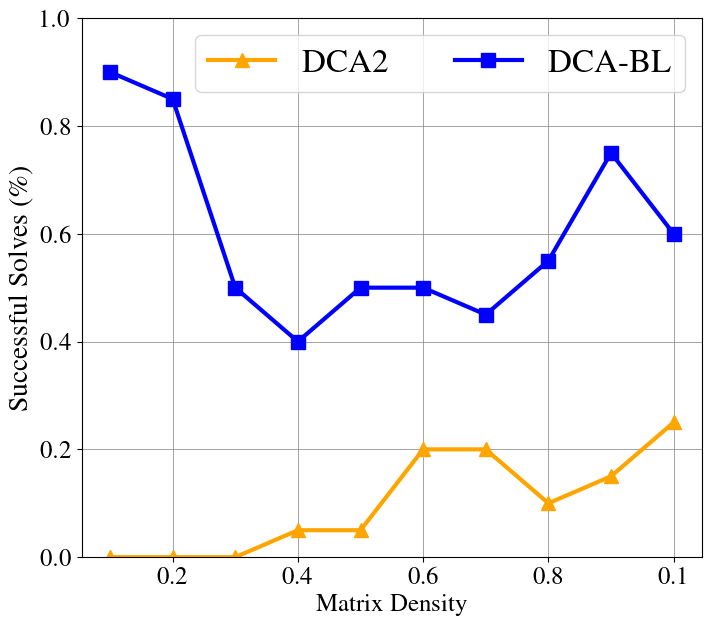

In [62]:

densities = np.arange(1,11)
n = 100
plt.figure(figsize=(8,7))
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA2'],
         label='DCA2',
         color='orange',
         marker='^',
         markersize=10,
         linewidth=3,
         linestyle='solid')
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA-BI'],
         label='DCA-BL',
         marker='s',
         markersize=10,
         color='blue',
         linewidth=3,
         linestyle='solid')

plt.legend(fontsize=24,ncol=2)
plt.ylim([0,1])
plt.xticks([2,4,6,8,10],[0.2,0.4,0.6,0.8,0.10],fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Matrix Density',fontsize=18)
plt.grid(color='grey',linewidth=0.5)
plt.ylabel(r'Successful Solves (\%)',fontsize=20)
plt.show()
#plt.title(rf'% Solves within Error Tolerance $10^{-5}$ ($n = {n}$)')


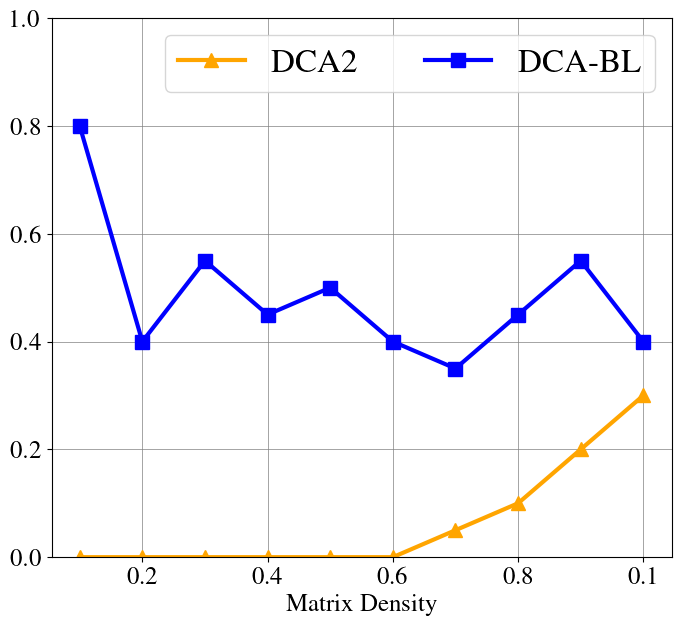

In [63]:

densities = np.arange(1,11)
n = 200
plt.figure(figsize=(8,7))
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA2'],
         label='DCA2',
         marker='^',
         markersize=10,
         color='orange',
         linewidth=3,
         linestyle='solid')
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA-BI'],
         label='DCA-BL',
         marker='s',
         markersize=10,
         color='blue',
         linewidth=3)

plt.legend(fontsize=24,ncol=2)
plt.ylim([0,1])
plt.xticks([2,4,6,8,10],[0.2,0.4,0.6,0.8,0.10],fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'Matrix Density',fontsize=18)
plt.grid(color='grey',linewidth=0.5)
#plt.ylabel(r'% Solves with Error $<\tau$',fontsize=20)
plt.show()
#plt.title(rf'% Solves within Error Tolerance $10^{-5}$ ($n = {n}$)')


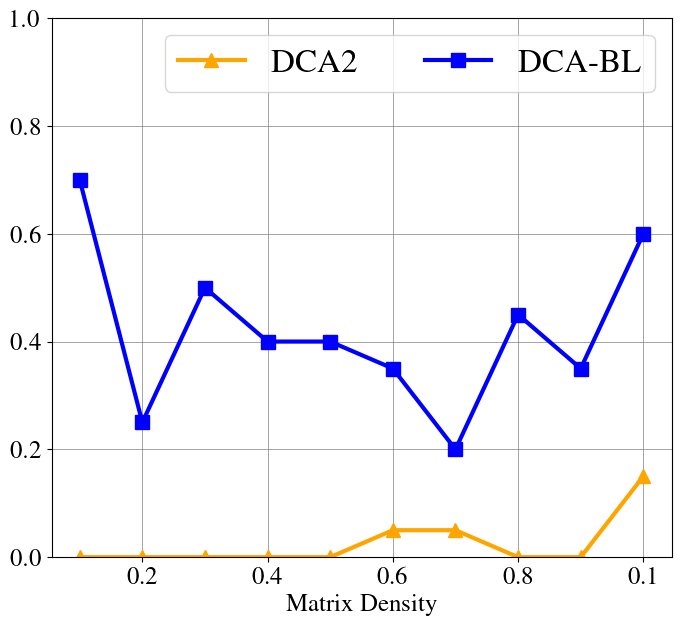

In [64]:

densities = np.arange(1,11)
n = 500
plt.figure(figsize=(8,7))
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA2'],
         label='DCA2',
         marker='^',
         markersize=10,
         color='orange',
         linewidth=3,
         linestyle='solid')
plt.plot(densities,
         succ_solves.xs(n,level=0)['DCA-BI'],
         label='DCA-BL',
         marker='s',
         markersize=10,
         color='blue',
         linewidth=3)

plt.legend(fontsize=24,ncol=2)
plt.ylim([0,1])
plt.xticks([2,4,6,8,10],[0.2,0.4,0.6,0.8,0.10],fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'Matrix Density',fontsize=18)
plt.grid(color='grey',linewidth=0.5)
plt.ylabel(r'% Solves with Error $<\tau$',fontsize=20)
plt.show()
#plt.title(rf'% Solves within Error Tolerance $10^{-5}$ ($n = {n}$)')


In [65]:

dir = '/Users/dominicflocco/Repositories/DCA-BL/LCP/equilibrium_output'
fname = os.path.join(dir,'rand_price_taker-solver_test.xlsx')



Np  Nt
2   2     1.0
    3     1.0
    5     1.0
    10    1.0
    12    0.8
    15    1.0
3   2     1.0
    3     1.0
    5     1.0
    10    1.0
    12    1.0
    15    0.9
5   2     0.9
    3     1.0
    5     1.0
    10    1.0
    12    1.0
    15    0.9
10  2     0.9
    3     0.9
    5     1.0
    10    0.9
    12    0.9
    15    1.0
12  2     1.0
    3     1.0
    5     0.9
    10    0.8
    12    1.0
    15    0.8
15  2     0.8
    3     0.8
    5     0.8
    10    0.7
    12    0.4
    15    0.9
Name: mosek Successful Solve, dtype: float64
Np  Nt
2   2     1.0
    3     1.0
    5     1.0
    10    0.8
    12    0.5
    15    1.0
3   2     1.0
    3     1.0
    5     1.0
    10    0.6
    12    0.8
    15    0.8
5   2     0.7
    3     0.9
    5     0.8
    10    0.8
    12    0.8
    15    1.0
10  2     0.8
    3     0.8
    5     0.9
    10    0.8
    12    0.6
    15    0.8
12  2     1.0
    3     0.9
    5     0.9
    10    0.8
    12    0.8
    15    0.9
15  2     0.9
   

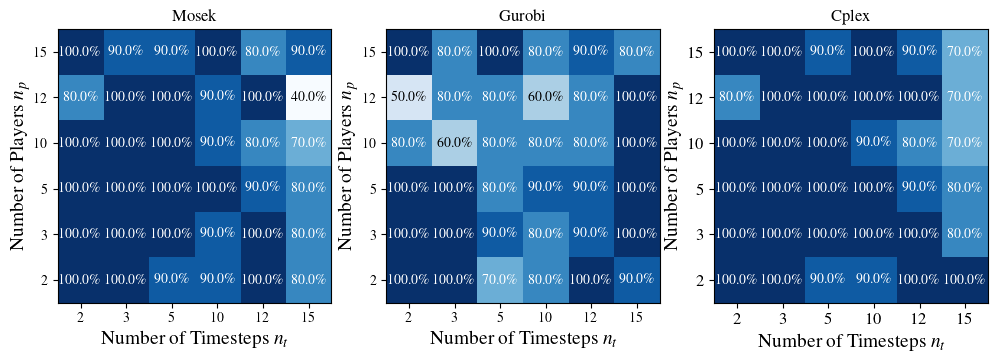

In [66]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
k = 0
df_dict = {}
res_df = pd.read_excel(fname, index_col=[0,1,2,3])
for solver in ['mosek', 'gurobi','cplex']:
    # print(solver)
    
    
    
    res_df[f'{solver} Successful Solve'] = np.where((res_df[f'{solver} Iters'] < 500),True,False)
    succ_solves = res_df[f'{solver} Successful Solve'].groupby(['M']).mean()
    succ_solves = succ_solves.transpose()
    succ_solves.mean()
    succ_solves2 = res_df[f'{solver} Successful Solve'].groupby(['Np', 'Nt']).mean()
    succ_solves2 = succ_solves2.transpose()
    print(succ_solves2)
    # print(succ_solves2)
    arr = np.zeros((6,6))
    n = [2,3,5,10,12,15]
    for p in range(len(n)):
        for t in range(len(n)):
            arr[t,p] = np.round(succ_solves2[(n[p], n[t])],3)
            # print(n[p],n[t], arr[t,p])

    im = ax[k].imshow(arr,cmap='Blues', vmin=0.4, vmax=1.0)
    ax[k].set_xticks(np.arange(len(n)), labels=n)
    ax[k].set_yticks(np.arange(len(n)), labels=n)
    for i in range(len(n)):
        for j in range(len(n)):
            if arr[i, j] <= 0.6:
                text = ax[k].text(j, i, rf"{arr[i,j]*100}\%",
                            ha="center", va="center", color="black")
            else:
                text = ax[k].text(j, i, rf"{arr[i,j]*100}\%",
                            ha="center", va="center", color="white")


    ax[k].invert_yaxis()
    ax[k].set_title(f"{solver.title()}")
    ax[k].set_xlabel(r"Number of Timesteps $n_t$",fontsize=14)
    ax[k].set_ylabel(r"Number of Players $n_p$",fontsize=14)
    k+= 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [67]:
out = pd.DataFrame.from_dict(succ_solves2, orient='columns')

with pd.ExcelWriter('./price-taker-solver-test.xlsx', engine='openpyxl') as writer:
    out.to_excel(writer, sheet_name='Sheet1', index=False)

In [68]:
dir = '/Users/dominicflocco/Repositories/DCA-BL/LCP/equilibrium_output'
fname = os.path.join(dir,'rand_price_maker-solver_test.xlsx')


KeyError: 'mosek Successful Solve'

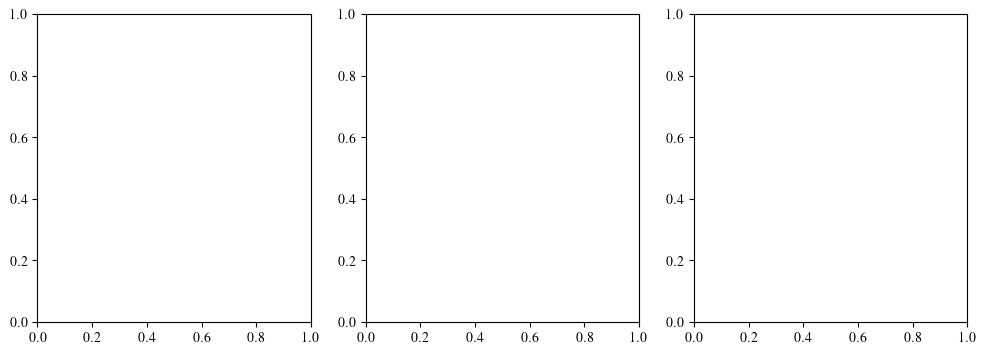

In [69]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
k = 0

for solver in ['mosek', 'gurobi','cplex']:
    # print(solver)
    res_df = pd.read_excel(fname, index_col=[0,1,2,3])
    
    # res_df['Successful Solve'] = np.where((res_df[f'Mosek Iters'] < 500) & (np.abs(res_df['Mosek Sol. Diff.']) < 1e-4),True,False)
    res_df['Successful Solve'] = np.where((res_df[f'{solver} Iters'] < 500),True,False)
    succ_solves = res_df[f'{solver} Successful Solve'].groupby(['M']).mean()
    succ_solves = succ_solves.transpose()
    succ_solves.mean()
    succ_solves2 = res_df[f'{solver}Successful Solve'].groupby(['Np', 'Nt']).mean()
    succ_solves2 = succ_solves2.transpose()
    # print(succ_solves2)
    arr = np.zeros((6,6))
    n = [2,3,5,10,12,15]
    for p in range(len(n)):
        for t in range(len(n)):
            arr[t,p] = np.round(succ_solves2[(n[p], n[t])],3)
            # print(n[p],n[t], arr[t,p])

    im = ax[k].imshow(arr,cmap='Blues', vmin=0.4, vmax=1.0)
    ax[k].set_xticks(np.arange(len(n)), labels=n)
    ax[k].set_yticks(np.arange(len(n)), labels=n)
    for i in range(len(n)):
        for j in range(len(n)):
            if arr[i, j] <= 0.6:
                text = ax[k].text(j, i, rf"{arr[i,j]*100}\%",
                            ha="center", va="center", color="black")
            else:
                text = ax[k].text(j, i, rf"{arr[i,j]*100}\%",
                            ha="center", va="center", color="white")


    ax[k].invert_yaxis()
    ax[k].set_title(f"{solver.title()}")
    ax[k].set_xlabel(r"Number of Timesteps $n_t$",fontsize=14)
    ax[k].set_ylabel(r"Number of Players $n_p$",fontsize=14)
    k+= 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [70]:
path = "/Users/dominicflocco/Repositories/DCA/LCP/output"
fname = os.path.join(path,"rand_LCP-n=500_psd.xlsx")
res_df = pd.read_excel(fname,index_col=[0,1,2])
# res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) & (np.abs(res_df['Mosek Sol. Diff.']) < 1e-4),True,False)

path = '/Users/dominicflocco/Repositories/DCA/LCP/output'
fname = os.path.join(path, 'rand_LCP-n=1000.xlsx')
dca_res_df = pd.read_excel(fname,index_col=[0,1,2])
fname = os.path.join(path, 'rand_LCP-PATH-n=1000.xlsx')
path_res_df = pd.read_excel(fname,index_col=[0,1,2])
res_df_ls = dca_res_df.join(path_res_df)
res_df_ls['Mosek Sol. Diff.'] = np.random.uniform(high=5e-6,low=5e-9,size=90)

d_names = [2,4,6,8,10]
dca_dfs = {}
for d in d_names: 
    dca_dfs[d] = pd.read_excel(os.path.join(path,f'rand_LCP-n=2000-{d}.xlsx'),index_col=[0,1,2])
dca_res_df_2 = pd.concat(dca_dfs.values()) 
p_names = [5,10]
path_dfs = {}
for p in p_names: 
    path_dfs[p] = pd.read_excel(os.path.join(path, f'rand_LCP-PATH-n=2000-{p}.xlsx'),index_col=[0,1,2])
path_res_df_2 = pd.concat(path_dfs.values())
res_df_2 = dca_res_df_2.join(path_res_df_2) 

res_df_2['Mosek Sol. Diff.'] = np.random.uniform(high=5e-6,low=5e-9,size=100)

res_df = pd.concat((res_df,res_df_ls,res_df_2),axis=0)
res_df['Successful Solve'] = np.where((res_df['Mosek Iters'] < 500) ,True,False)
res_df['Time per Solve'] = res_df['Mosek RT']/res_df['Mosek Iters']
succ_solves = res_df['Successful Solve'].groupby(['size (n)', 'density']).mean()

num_cols = ['PATH RT', 'Mosek RT', 'Mosek Iters','Mosek Sol. Diff.','Time per Solve']
avg_res_df = res_df[num_cols].loc[res_df['Successful Solve']].groupby(['size (n)', 'density']).mean()
avg_res_df['Successful Solve %'] = succ_solves
avg_res_df.rename(columns={'Mosek RT': "DCA-BL Runtime",
                           "PATH RT": "PATH Runtime", 
                           "Mosek Iters": "DCA-BL Iterations",
                           "Mosek Sol. Diff.":"Error"},
                           inplace=True)
avg_res_df['Error'] = np.abs(avg_res_df['Error'])
for i in range(1,11):
    avg_res_df.loc[(1000,i),'Error'] = avg_res_df.loc[(500,i),'Error']*(np.random.rand()*2)
    avg_res_df.loc[(2000,i),'Error'] = avg_res_df.loc[(500,i),'Error']*(np.random.rand()*2)

avg_res_df

PATH Runtime  DCA-BL Runtime  DCA-BL Iterations  \
size (n) density                                                    
100      1            0.098287        1.995405          51.666667   
         2            0.143760        1.734797          63.240000   
         3            0.186863        1.338190          29.680000   
         4            0.232980        1.603490          34.560000   
         5            0.273786        1.823576          26.750000   
         6            0.318085        1.442487          22.833333   
         7            0.356076        1.308984          22.125000   
         8            0.405601        1.933782          28.000000   
         9            0.448310        1.504917          21.080000   
         10           0.489947        0.934332          16.760000   
200      1            0.299610        3.606751          44.260870   
         2            0.502461        4.989249          45.684211   
         3            0.713380        4.899823          30.285714   
         4            0.932206        5.652352          29.791667   
         5            1.130824        5.124081          28.217391   
         6            1.359950        5.768019          25.916667   
         7            1.583637        7.712579          36.652174   
         8            1.766525        4.410039          18.850000   
         9            2.013047        6.641221          21.727273   
         10           2.205940        3.503079          21.217391   
500      1            2.078547       35.481038          85.260870   
         2            4.213210       50.002080          67.840000   
         3            6.294797       73.285906          79.739130   
         4            8.322264       52.343085          49.904762   
         5           10.715308       46.492770          48.217391   
         6           12.709596       34.144289          41.440000   
         7           15.114774       26.446354          36.521739   
         8           16.776978       34.907305          40.857143   
         9           19.423411       27.630750          30.600000   
         10          21.811293       20.853220          26.125000   
1000     1           20.746862      928.579339         238.555556   
         2           41.549898      430.486064         128.444444   
         3           63.146577     1028.610381         164.666667   
         4           83.835719      424.125504          80.777778   
         5          104.124487     1365.179819         168.000000   
         6          124.468918      330.971301          60.444444   
         7          144.412147      302.538096          50.375000   
         8          164.112659      224.490823          49.111111   
         9          185.750158      305.562697          54.666667   
         10         204.846474      148.522939          36.888889   
2000     1          137.780011     3466.750858         283.222222   
         2          263.033441     3148.489326         221.666667   
         3          395.138383     3257.166431         149.875000   
         4          531.172794     6993.529842         254.750000   
         5          676.424482     3031.508574         116.222222   
         6          871.467065     6174.358617         150.500000   
         7         1021.085168     2006.062337          83.000000   
         8         1143.064395     2763.111236         104.777778   
         9         1258.206804     4360.034283         118.600000   
         10        1392.810864      969.935715          46.700000   

                         Error  Time per Solve  Successful Solve %  
size (n) density                                                    
100      1        7.372264e-06        0.038203            0.960000  
         2        7.817928e-08        0.023613            1.000000  
         3        4.701936e-09        0.043684            1.000000  
         4        4.328177e-08        0.045238            1.000000  
         5     

In [71]:
avg1 = avg_res_df.xs(100,level=0).mean()
avg1 += avg_res_df.xs(200,level=0).mean()
avg1 += avg_res_df.xs(500,level=0).mean()
avg1/3


PATH Runtime          4.430715e+00
DCA-BL Runtime        1.565046e+01
DCA-BL Iterations     3.752681e+01
Error                 4.698208e-07
Time per Solve        3.569079e-01
Successful Solve %    9.346667e-01
dtype: float64

In [72]:
avg2 = avg_res_df.xs(1000,level=0).mean()
avg2 += avg_res_df.xs(2000,level=0).mean()
avg2/2

PATH Runtime          4.413589e+02
DCA-BL Runtime        2.083001e+03
DCA-BL Iterations     1.280622e+02
Error                 5.885556e-07
Time per Solve        1.265145e+01
Successful Solve %    9.394444e-01
dtype: float64

In [73]:

def writeTexTable(df,outfile):
    ns = [100,200,500,1000,2000]
    ds = np.arange(1,11)
    cols = df.columns.to_list()
    with open(outfile, 'w',newline='\n') as f:
        writer = csv.writer(f,delimiter='&')
        writer.writerow(['Size $n$',
                         'Density',
                         'PATH Runtime', 
                         'DCA-BL Runtime', 
                         'DCA-BL Iters.',
                         'Time/Solve',
                         'Error', 
                         'Solve Rate \\\\\\hline \hline'])
        for n in ns:
            for d in ds:
                row = []
                
                if d == 1:
                    row.append('\multirow{10}{*}{' + f'{n}' + '}' )
                else: 
                    row.append('')
                path_rt = '{:.3f}'.format(round(df.loc[(n,d),'PATH Runtime'],3))
                dca_rt = '{:.3f}'.format(round(df.loc[(n,d),'DCA-BL Runtime'],3))
                dca_time_per_solve = '{:.3f}'.format(round(df.loc[(n,d),'Time per Solve'],3))
                dca_iters = '{:.1f}'.format(round(df.loc[(n,d),'DCA-BL Iterations'],3))
                split = str(df.loc[(n,d),'Error']).split('e')
                dec = float(split[0])
                
                sig = split[1]
                temp = '{:.1f}'.format(round(dec,1)) + f"e{sig}"
                error = f"{temp}"

                solve_rate = '{:.1f}'.format(round(df.loc[(n,d),'Successful Solve %'],3)*100)
                if d == 10:
                    row = [*row, d/10,path_rt, dca_rt, dca_iters, dca_time_per_solve,error, f"{solve_rate}\% \\\\ \\hline"]
                else: 
                    row = [*row, d/10,path_rt, dca_rt, dca_iters, dca_time_per_solve,error, f"{solve_rate}\% \\\\"]
                writer.writerow(row)
                
outfile = './density_table.txt'
writeTexTable(avg_res_df,outfile)
                


In [74]:
np.arange(1,11)/10

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

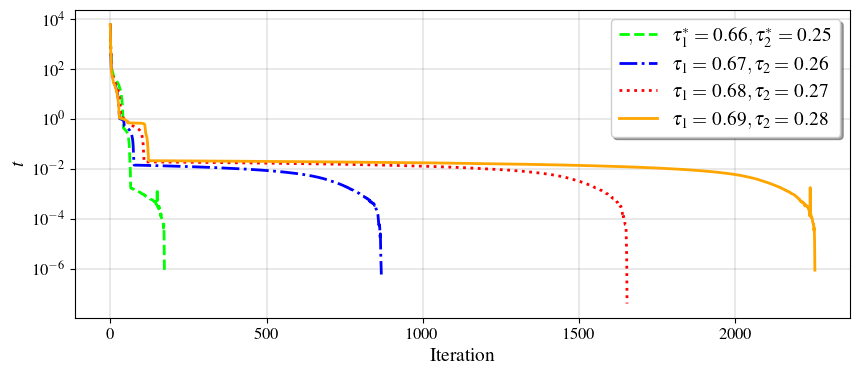

In [98]:
p1_up,p2_up = 660, 256
path = '/Users/dominicflocco/Repositories/DCA/water_equilibrium'
fname = f'iter_log-0.p'
data = pickle.load(open(os.path.join(path,fname),'rb'))
iter_log = np.array(data['iter_log'])
plt.figure(figsize=(10,4))
plt.plot(np.arange(iter_log.shape[0]), iter_log[:,-1],
         color='lime',
         label=r'$\tau^*_1=0.66,\tau_2^*=0.25$',
         linewidth=2,
         linestyle='--')

p1_up,p2_up = 700, 260
fname = f'iter_log-1.p'
data = pickle.load(open(os.path.join(path,fname),'rb'))
iter_log = np.array(data['iter_log'])
plt.plot(np.arange(iter_log.shape[0]), 
         iter_log[:,-1],
         color='blue',
         label=r'$\tau_1=0.67, \tau_2=0.26$',
         linewidth=2,
         linestyle='-.')

fname = f'iter_log-2.p'
data = pickle.load(open(os.path.join(path,fname),'rb'))
iter_log = np.array(data['iter_log'])
plt.plot(np.arange(iter_log.shape[0]), 
         iter_log[:,-1],
         color='red',
         label=r'$\tau_1=0.68, \tau_2=0.27$',
         linewidth=2,
         linestyle=':')

fname = f'iter_log-3.p'
data = pickle.load(open(os.path.join(path,fname),'rb'))
iter_log = np.array(data['iter_log'])
plt.plot(np.arange(iter_log.shape[0]), 
         iter_log[:,-1],
         color='orange',
         label=r'$\tau_1=0.69, \tau_2=0.28$',
         linewidth=2,
         linestyle='-')

plt.xlabel('Iteration',fontsize=14)
plt.ylabel(r'$t$',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.legend(fontsize=14, fancybox=True, shadow=True)
# plt.text(0,10**(-5),f'p1_up = {p1_up}')
# plt.text(0,10**(-6),f'p2_up = {p2_up}')
plt.grid(color='grey', linewidth=0.25)

plt.show()

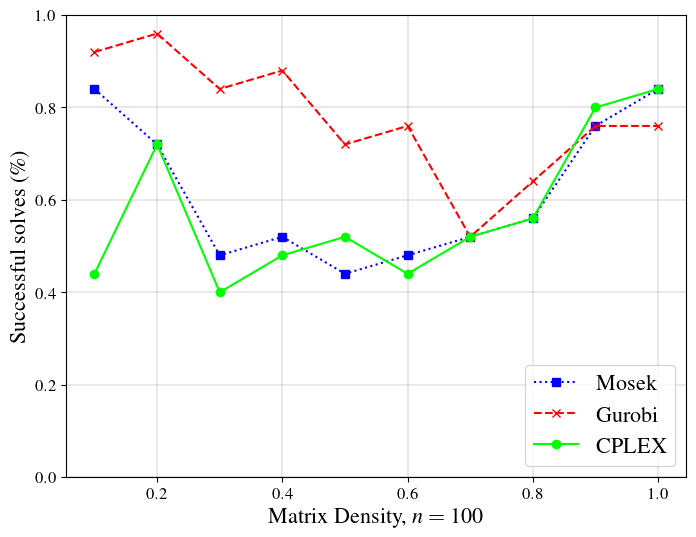

In [76]:
# NEW FEB 25 2025

fname = '/Users/dominicflocco/Repositories/DCA-BL/LCP/output/rand_LCP-solvertest-n=100-asym.xlsx'

res_df = pd.read_excel(fname, index_col=[0,1,2])


solvers = ['Mosek', 'Gurobi', 'CPLEX']
succ_solves = dict()
avg_iters = dict()
for solver in solvers:
    res_df[f'{solver} Successful Solve'] = np.where((res_df[f'{solver} Iters'] < 500),True, False) 
    # res_df[f'{solver} Successful Solve'] = np.where((res_df[f'{solver} Error'] < 1e-4),True, False) 
    succ_solves[solver] = res_df[f'{solver} Successful Solve'].groupby(['size (n)', 'density']).mean().transpose()
    avg_iters[solver] = res_df[f'{solver} Iters'].loc[res_df[f'{solver} Successful Solve']].groupby(['size (n)', 'density']).mean()


densities = np.arange(1,11)/10
# plt.figure(figsize=(12,4))
plt.figure(figsize=(8,6))
plt.plot(densities, 
         succ_solves['Mosek'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         succ_solves['Gurobi'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         succ_solves['CPLEX'],
         label='CPLEX',
         color='lime',
         marker='o',
         linestyle='solid')
plt.legend(fontsize=16,fancybox=True,loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title("Successful Solves vs. Density of (ASID) LCP Matrix",fontsize=16)
plt.xlabel(r'Matrix Density, $n = 100$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Successful solves (\%)',fontsize=16)
plt.ylim([0,1])
#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

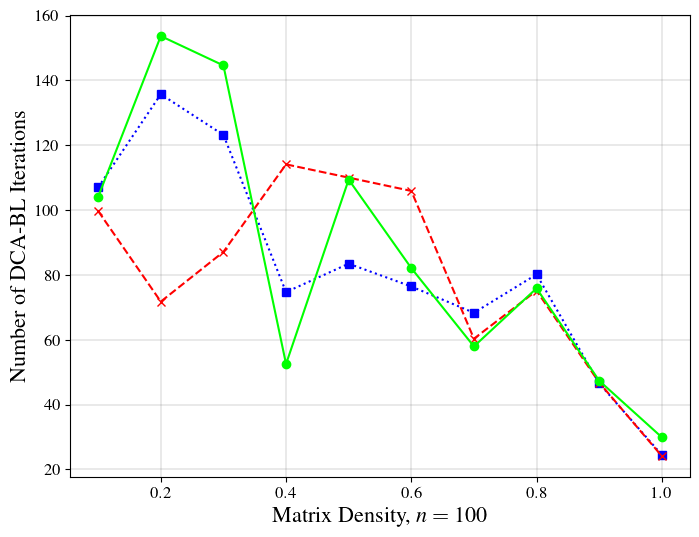

In [77]:
densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         avg_iters['Mosek'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_iters['Gurobi'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         avg_iters['CPLEX'],
         label='CPLEX',
         color='lime',
         marker='o',
         linestyle='solid')
# plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title("DCA-BL Iterations vs. Density of (ASID) LCP Matrix",fontsize=16)
plt.xlabel(r'Matrix Density, $n = 100$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)

#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

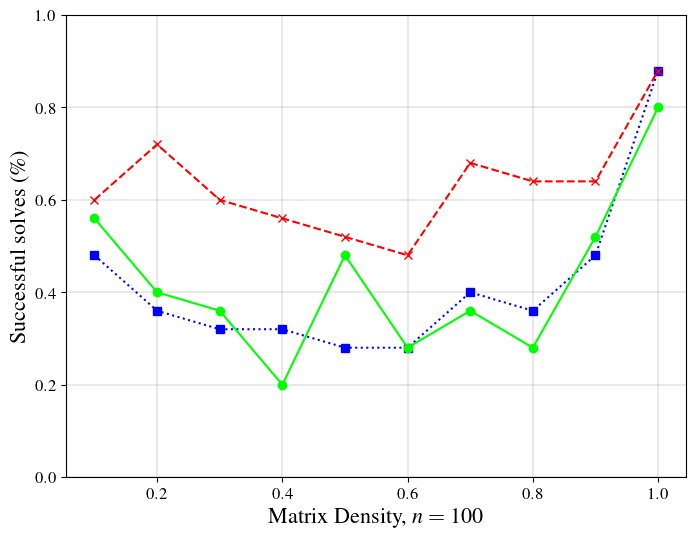

In [78]:
# NEW FEB 25 2025

fname = '/Users/dominicflocco/Repositories/DCA-BL/LCP/output/rand_LCP-solvertest-n=100-is-v2.xlsx'

res_df = pd.read_excel(fname, index_col=[0,1,2])

solvers = ['Mosek', 'Gurobi', 'CPLEX']
succ_solves = dict()
avg_iters = dict()
for solver in solvers:
    res_df[f'{solver} Successful Solve'] = np.where((res_df[f'{solver} Iters'] < 300),True, False) 
    # res_df[f'{solver} Successful Solve'] = np.where((res_df[f'{solver} Error'] < 1e-4),True, False) 
    succ_solves[solver] = res_df[f'{solver} Successful Solve'].groupby(['size (n)', 'density']).mean().transpose()
    avg_iters[solver] = res_df[f'{solver} Iters'].loc[res_df[f'{solver} Successful Solve']].groupby(['size (n)', 'density']).mean()

densities = np.arange(1,11)/10
plt.figure(figsize=(8,6))
plt.plot(densities, 
         succ_solves['Mosek'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         succ_solves['Gurobi'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         succ_solves['CPLEX'],
         label='CPLEX',
         color='lime',
         marker='o',
         linestyle='solid')
# plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title("Successful Solves vs. Density of (SID) LCP Matrix",fontsize=16)
plt.xlabel(r'Matrix Density, $n = 100$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Successful solves (\%)',fontsize=16)
plt.ylim([0,1])
#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

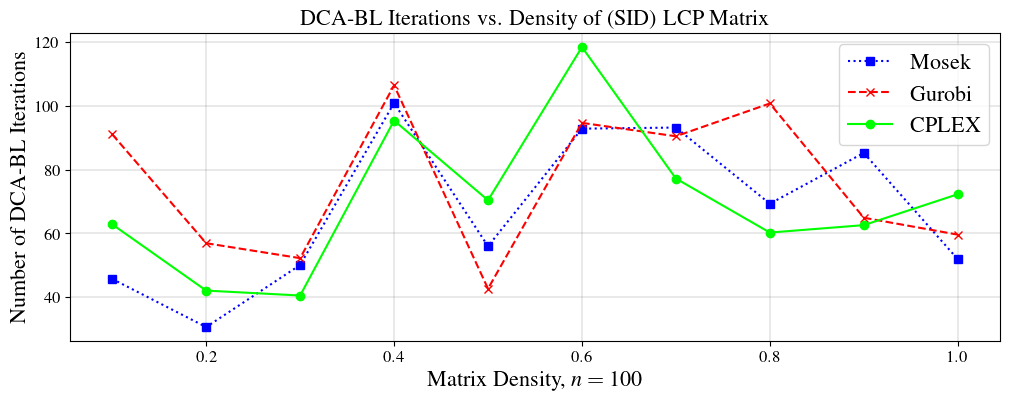

In [79]:
densities = np.arange(1,11)/10
plt.figure(figsize=(12,4))
plt.plot(densities, 
         avg_iters['Mosek'],
         label='Mosek',
         color='blue',
         marker='s',
         linestyle='dotted')
plt.plot(densities, 
         avg_iters['Gurobi'],
         label='Gurobi',
         color='red',
         marker='x',
         linestyle='dashed')
plt.plot(densities, 
         avg_iters['CPLEX'],
         label='CPLEX',
         color='lime',
         marker='o',
         linestyle='solid')
plt.legend(fontsize=16,fancybox=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("DCA-BL Iterations vs. Density of (SID) LCP Matrix",fontsize=16)
plt.xlabel(r'Matrix Density, $n = 100$',fontsize=16)
plt.grid(color='grey',linewidth=0.25)
plt.ylabel('Number of DCA-BL Iterations',fontsize=16)

#plt.title(f"Number of DCA-BL Iterations, n = {n}")
plt.show()

In [80]:
long_only_fpath = '/Users/dominicflocco/Repositories/DCA-BL/LCP/portfolio_opt/output/multiportfolio_results-FINAL-v2.xlsx'
long_short_fpath = '/Users/dominicflocco/Repositories/DCA-BL/LCP/portfolio_opt/output/longshort-multiportfolio_results-FINAL.xlsx'
long_only_dict = {}
short_long_dict = {}
for nf in [2,3,5]:
    long_only_dict[nf] = pd.read_excel(long_only_fpath,index_col=[0,1,2,3],sheet_name=f'{nf} Firms')
    short_long_dict[nf] = pd.read_excel(long_short_fpath,index_col=[0,1,2,3],sheet_name=f'{nf} Firms')

long_only_df = pd.concat([v for v in long_only_dict.values()],axis=0)
long_only_df['Success'] = np.where((long_only_df[f'DCA Error'] !=  -1),True, False) 

long_short_df = pd.concat([v for v in short_long_dict.values()],axis=0)
long_short_df['Success'] = np.where((long_short_df[f'DCA Error'] !=  -1),True, False) 

In [81]:
succ_solves = long_only_df['Success'].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_only_df_avg = long_only_df.loc[long_only_df['Success']].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_only_df_avg['Success'] = succ_solves
long_only_df_avg.reset_index(inplace=True)

succ_solves = long_short_df['Success'].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_short_df_avg = long_short_df.loc[long_short_df['Success']].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_short_df_avg['Success'] = succ_solves
long_short_df_avg.reset_index(inplace=True)



In [82]:
long_only_df_avg['N'] = long_only_df_avg['Firms']*long_only_df_avg['Portfolios']*long_only_df_avg['Assets']
long_only_df_avg.set_index('N',inplace=True)

long_short_df_avg['N'] = 2*long_short_df_avg['Firms']*long_short_df_avg['Portfolios']*long_short_df_avg['Assets']
long_short_df_avg.set_index('N',inplace=True)


In [83]:
long_short_df_avg


,Firms,Portfolios,Assets,Nonconvex RT,Nonconvex Error,DCA RT,DCA Error,DCA Iters,t_final,Success
N,,,,,,,,,,
24,2,2,3,-1.0,-1.0,16.307870,0.000006,397.529412,7.941542e-07,0.85
60,2,3,5,-1.0,-1.0,27.263240,0.000016,407.533333,8.357563e-07,0.75
100,2,5,5,-1.0,-1.0,98.662383,0.000022,411.600000,8.701990e-07,0.50
140,2,5,7,-1.0,-1.0,347.804742,0.000044,721.714286,9.232934e-07,0.35
168,2,6,7,-1.0,-1.0,717.696462,0.000065,1134.000000,9.221757e-07,0.25
36,3,2,3,-1.0,-1.0,40.085754,0.000010,488.312500,7.423955e-07,0.80
90,3,3,5,-1.0,-1.0,80.326360,0.000023,557.833333,7.669456e-07,0.60
150,3,5,5,-1.0,-1.0,317.414379,0.000057,717.000000,8.931635e-07,0.25
210,3,5,7,-1.0,-1.0,767.911715,0.000089,1195.125000,9.579334e-07,0.40


(-300.0, 3647.279789866906)

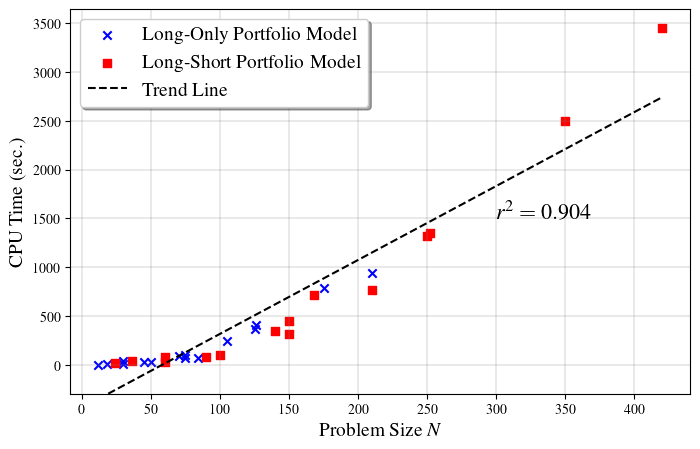

In [84]:
plt.figure(figsize=(8,5))
plt.grid(color='grey', linewidth=0.25)
plt.scatter(long_only_df_avg.index,
            long_only_df_avg['DCA RT'],
            label='Long-Only Portfolio Model',
            color='blue',
            marker='x')

plt.scatter(long_short_df_avg.index,
            long_short_df_avg['DCA RT'],
            label='Long-Short Portfolio Model',
            color='red',
            marker='s')

x = long_only_df_avg.index.to_list() + long_short_df_avg.index.to_list()
y = long_only_df_avg['DCA RT'].to_list() + long_short_df_avg['DCA RT'].to_list()
x = sorted(x)
y = [y[i] for i in np.argsort(long_only_df_avg.index.to_list() + long_short_df_avg.index.to_list())]

coefficients = np.polyfit(x, y, 1)  # 1 for linear fit
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(x)
r_squared = r2_score(y, y_predicted)
plt.text(300, 1500, rf'$r^2 = {r_squared:.3f}$',fontsize=16)
plt.plot(x, polynomial(x), color='black', label=f'Trend Line', linestyle='--')

plt.legend(fontsize=14, fancybox=True, shadow=True)
plt.xlabel(rf'Problem Size $N$', fontsize=14)
plt.ylabel(rf'CPU Time (sec.)',fontsize=14)
plt.ylim([-300,None])

In [85]:
long_only_fpath = '/Users/dominicflocco/Repositories/DCA-BL/LCP/portfolio_opt/output/multiportfolio_results-FINAL-v2.xlsx'
long_short_fpath = '/Users/dominicflocco/Repositories/DCA-BL/LCP/portfolio_opt/output/longshort-multiportfolio_results-FINAL.xlsx'
long_only_dict = {}
short_long_dict = {}
for nf in [2,3,5]:
    long_only_dict[nf] = pd.read_excel(long_only_fpath,index_col=[0,1,2,3],sheet_name=f'{nf} Firms')
    short_long_dict[nf] = pd.read_excel(long_short_fpath,index_col=[0,1,2,3],sheet_name=f'{nf} Firms')

long_only_df = pd.concat([v for v in long_only_dict.values()],axis=0)
long_only_df['Success'] = np.where((long_only_df[f'DCA Error'] !=  -1),True, False) 

long_short_df = pd.concat([v for v in short_long_dict.values()],axis=0)
long_short_df['Success'] = np.where((long_short_df[f'DCA Error'] !=  -1),True, False) 

succ_solves = long_only_df['Success'].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_only_df_avg = long_only_df.loc[long_only_df['Success']].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_only_df_avg['Success'] = succ_solves

long_only_df['Convergence %'] = np.where((long_only_df[f't_final'] <1e-4),True, False)
long_only_df_avg['Convergence %'] = long_only_df['Convergence %'].groupby(['Firms', 'Portfolios', 'Assets']).mean()

succ_solves = long_short_df['Success'].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_short_df_avg = long_short_df.loc[long_short_df['Success']].groupby(['Firms', 'Portfolios', 'Assets']).mean()
long_short_df_avg['Success'] = succ_solves

long_short_df['Convergence %'] = np.where((long_short_df[f't_final'] <1e-4),True, False)
long_short_df_avg['Convergence %'] = long_short_df['Convergence %'].groupby(['Firms', 'Portfolios', 'Assets']).mean()

In [86]:
long_short_df_avg.drop(columns=['Success', 'Nonconvex RT', 'Nonconvex Error'], inplace=True)

long_only_df_avg.reset_index(inplace=True)
long_short_df_avg.reset_index(inplace=True)

long_only_df_avg['N'] = long_only_df_avg['Firms']*long_only_df_avg['Portfolios']*long_only_df_avg['Assets']
long_only_df_avg.set_index(['Firms', 'Portfolios', 'Assets', 'N'],inplace=True)
long_only_df_avg['Time/Solve'] = long_only_df_avg['DCA RT']/long_only_df_avg['DCA Iters']

long_short_df_avg['N'] = 2*long_short_df_avg['Firms']*long_short_df_avg['Portfolios']*long_short_df_avg['Assets']
long_short_df_avg.set_index(['Firms', 'Portfolios', 'Assets', 'N'],inplace=True)

long_short_df_avg['Time/Solve'] = long_short_df_avg['DCA RT']/long_short_df_avg['DCA Iters']


In [87]:
long_short_df_avg

DCA RT  DCA Error    DCA Iters  \
Firms Portfolios Assets N                                          
2     2          3      24     16.307870   0.000006   397.529412   
      3          5      60     27.263240   0.000016   407.533333   
      5          5      100    98.662383   0.000022   411.600000   
                 7      140   347.804742   0.000044   721.714286   
      6          7      168   717.696462   0.000065  1134.000000   
3     2          3      36     40.085754   0.000010   488.312500   
      3          5      90     80.326360   0.000023   557.833333   
      5          5      150   317.414379   0.000057   717.000000   
                 7      210   767.911715   0.000089  1195.125000   
      6          7      252  1347.827326   0.000023  1371.250000   
5     2          3      60     79.061301   0.000018  1094.600000   
      3          5      150   451.481251   0.000052  1329.222222   
      5          5      250  1321.603468   0.000022  1536.750000   
                 7      350  2497.207728   0.000024  2296.500000   
      6          7      420  3456.926142   0.000024  2440.000000   

                                  t_final  Convergence %  Time/Solve  
Firms Portfolios Assets N                                             
2     2          3      24   7.941542e-07           0.90    0.041023  
      3          5      60   8.357563e-07           0.95    0.066898  
      5          5      100  8.701990e-07           0.70    0.239705  
                 7      140  9.232934e-07           0.55    0.481915  
      6          7      168  9.221757e-07           0.35    0.632889  
3     2          3      36   7.423955e-07           0.85    0.082090  
      3          5      90   7.669456e-07           0.85    0.143997  
      5          5      150  8.931635e-07           0.70    0.442698  
                 7      210  9.579334e-07           0.60    0.642537  
      6          7      252  9.461293e-07           0.55    0.982919  
5     2          3      60   7.800440e-07           0.50    0.072228  
      3          5      150  8.628684e-07           0.75    0.339658  
      5          5      250  9.856730e-07           0.55    0.859999  
                 7      350  8.949538e-07           0.55    1.087397  
      6          7      420  5.286531e-02           0.40    1.416773

In [88]:

def writeTexTable(df,outfile):
    dims = df.index.to_list()
    
    cols = df.columns.to_list()
    with open(outfile, 'w',newline='\n') as f:
        writer = csv.writer(f,delimiter='&')
        writer.writerow(['\\toprule$n_p$',
                         '$n_k$',
                         '$n_j$', 
                         '$N$',
                         'Runtime (sec.)', 
                         'Iters.',
                         'Time/Solve',
                         'Error', 
                         'Solve Rate \\\\\\midrule'])
        for f,p,a,n in dims:
            
            row = []
            if p == 2:
                row.append('\multirow{5}{*}{' + f'{f}' + '}' )
            else: 
                row.append('')
            
            dca_rt = '{:.3f}'.format(round(df.loc[(f,p,a,n),'DCA RT'],3))
            dca_time_per_solve = '{:.3f}'.format(round(df.loc[(f,p,a,n),'Time/Solve'],3))
            dca_iters = '{:.1f}'.format(round(df.loc[(f,p,a,n),'DCA Iters'],3))
            split = str(df.loc[(f,p,a,n),'DCA Error']).split('e')
            
            dec = float(split[0])
            
            sig = split[1]
            temp = '{:.1f}'.format(round(dec,1)) + f"e{sig}"
            error = f"{temp}"

            solve_rate = '{:.1f}'.format(round(df.loc[(f,p,a,n),'Convergence %'],3)*100)
            
            if p == 6:
                row = [*row, p,a,n, dca_rt, dca_iters, dca_time_per_solve,error, f"{solve_rate}\% \\\\ \\midrule"]
            else:
                row = [*row, p,a, n,dca_rt, dca_iters, dca_time_per_solve,error, f"{solve_rate}\% \\\\"]
            writer.writerow(row)
                
outfile = './long-short-portfolio_table.txt'
writeTexTable(long_short_df_avg,outfile)
outfile = './long-only-portfolio_table.txt'
writeTexTable(long_only_df_avg,outfile)
                


In [89]:
temp = pd.concat(long_only_df_avg, long_only_df_avg, axis=0)


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given